# IMDB Movie Reviews Sentiment Analysis

## What is Sentiment?

Sentiment analysis is the interpretation and classification of emotions within text data using text analysis techniques.
- Positive
- Neutral
- Negative



Sentiment analysis is a machine learning technique that detects polarity.

## How Sentiment is Detected from Text Data?

- Text cleaning 
- Text data is converted into numerical data
- ML model is trained
- Test and Evaluate the model

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('imdb_reviews.txt', sep = '\t', header = None)

In [4]:
df.columns = ['reviews', 'sentiment']

In [5]:
df.head()

,reviews,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [6]:
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords

- checking the data is balanced or not 

In [7]:
ps = PorterStemmer()
import re

In [8]:
df['sentiment'].value_counts()

1    386
0    362
Name: sentiment, dtype: int64

- the data is almost balanced 

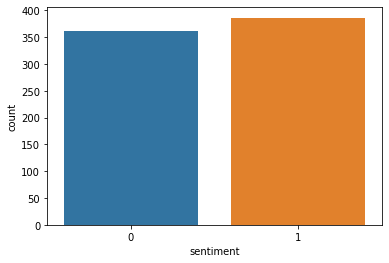

In [9]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df['sentiment'])
plt.show()

#### word_count

In [10]:
df['word_counts'] = df['reviews'].apply(lambda x : len(str(x).split()))

### character_count

In [11]:
def kamal(x):
    x = x.split()
    c = ''.join(x)
    return len(c)
    
df['char_counts'] = df['reviews'].apply(lambda x : kamal(str(x)))

### stop_words_using_spacy

In [12]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = STOP_WORDS

In [13]:
import spacy
df['s_w_spacy'] = df['reviews'].apply(lambda x : len([i for i in x.split() if i in stopwords]))

### stop_words_using_nltk


In [14]:
from nltk.corpus import stopwords

In [15]:
df['s_w_nltk'] = df['reviews'].apply(lambda x : len([i for i in x.split() if i in stopwords.words("english")]))

In [16]:
df.sample(4)

,reviews,sentiment,word_counts,char_counts,s_w_spacy,s_w_nltk
611,Cinematography: The film was shot in an intere...,1,9,48,3,3
714,"Each track commands sentiment, actually contri...",1,11,72,3,3
648,"Otherwise, don't even waste your time on this.",0,8,39,3,3
488,This is just a great movie.,1,6,22,3,3


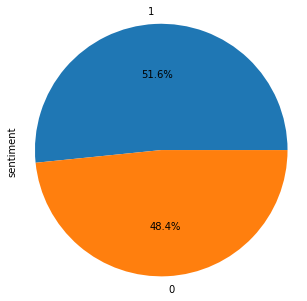

In [17]:
plt.figure(figsize =(5,5))
df["sentiment"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [18]:
c = []
for i in range(len(df)):
    solution = re.sub('[^a-zA-Z]',' ',df['reviews'][i])
    solution = solution.lower()
    solution = solution.split()
    solution = [ps.stem(k) for k in solution if k not in stopwords.words("english")]
    solution = ' '.join(solution)
    c.append(solution)
    

In [19]:
len(df)

748

In [20]:
df.shape

(748, 6)

In [21]:
c[0]

'slow move aimless movi distress drift young man'

In [22]:
df['reviews'][0]

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

In [23]:
len(c)

748

In [24]:
c

['slow move aimless movi distress drift young man',
 'sure lost flat charact audienc nearli half walk',
 'attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost non exist',
 'littl music anyth speak',
 'best scene movi gerardo tri find song keep run head',
 'rest movi lack art charm mean empti work guess empti',
 'wast two hour',
 'saw movi today thought good effort good messag kid',
 'bit predict',
 'love cast jimmi buffet scienc teacher',
 'babi owl ador',
 'movi show lot florida best made look appeal',
 'song best muppet hilari',
 'cool',
 'right case movi deliv everyth almost right face',
 'averag act main person low budget clearli see',
 'review long overdu sinc consid tale two sister singl greatest film ever made',
 'put gem movi term screenplay cinematographi act post product edit direct aspect film make',
 'practic perfect true masterpiec sea faux masterpiec',
 'structur film easili tightli construct histori cinema think film so

In [25]:
import numpy as np
X = np.array(c)

In [26]:
X

array(['slow move aimless movi distress drift young man',
       'sure lost flat charact audienc nearli half walk',
       'attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost non exist',
       'littl music anyth speak',
       'best scene movi gerardo tri find song keep run head',
       'rest movi lack art charm mean empti work guess empti',
       'wast two hour',
       'saw movi today thought good effort good messag kid',
       'bit predict', 'love cast jimmi buffet scienc teacher',
       'babi owl ador', 'movi show lot florida best made look appeal',
       'song best muppet hilari', 'cool',
       'right case movi deliv everyth almost right face',
       'averag act main person low budget clearli see',
       'review long overdu sinc consid tale two sister singl greatest film ever made',
       'put gem movi term screenplay cinematographi act post product edit direct aspect film make',
       'practic perfect true masterpie

In [27]:
y = np.array(df['sentiment'])

In [28]:
y[:5]

array([0, 0, 0, 0, 1], dtype=int64)

### Bag of words

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000)

In [30]:
X = cv.fit_transform(c).toarray()

In [31]:
X

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
X_train.shape

(598, 1000)

In [37]:
y_train.shape

(598,)

### Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
model.fit(X_train,y_train)


MultinomialNB()

In [41]:
model.score(X_train,y_train)

0.9247491638795987

In [43]:
model.score(X_test,y_test)

0.7866666666666666

## testing own_data

In [63]:
## testing data

testing = ['the movie is good','the movie is not good','the movie is not good but entire cast given their best']

In [64]:
testing

['the movie is good',
 'the movie is not good',
 'the movie is not good but entire cast given their best']

In [65]:
test_data_1 = cv.transform(testing)

In [66]:
test_data_1.shape

(3, 1000)

In [67]:
model.predict(test_data_1)

array([1, 1, 1], dtype=int64)

In [51]:
df['reviews'][0]

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

In [52]:
b = ['A very, very, very slow-moving, aimless movie about a distressed, drifting young man']

In [53]:
a = cv.transform(b)

In [54]:
model.predict(a)

array([0], dtype=int64)

In [55]:
a1 = ['the movie is to bad']
b1 = cv.transform(a1)
model.predict(b1)

array([0], dtype=int64)

In [56]:
che = ['the movie is to bad','the movie is good','the movie is not so excited']

In [57]:
sol1 = cv.transform(che)

In [58]:
model.predict(sol1)

array([0, 1, 1], dtype=int64)

In [59]:
pred = model.predict(sol1)

In [60]:
pred

array([0, 1, 1], dtype=int64)

In [61]:
data_predicted = pd.DataFrame(dict(x=che, y=pred))

### Predicted data_frame

In [62]:
data_predicted

,x,y
0,the movie is to bad,0
1,the movie is good,1
2,the movie is not so excited,1


## Fitting data for various models

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib.pyplot import figure

### svm 

In [69]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

### knn

In [70]:

def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

### Decision Tree

In [71]:

def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

### Forest

In [72]:

def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [75]:

def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)


In [76]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train score : 0.9230769230769231
Test score : 0.7266666666666667
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.7240802675585284
Test score : 0.6333333333333333
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 0.9966555183946488
Test score : 0.6666666666666666
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 0.9966555183946488
Test score : 0.7333333333333333


#### Performance model

In [77]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[50, 26],
       [10, 64]], dtype=int64)

In [78]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,50,26,76
1,10,64,74
All,60,90,150


### Classification Report (Accuracy, Precision, Recall, F1-score)

In [80]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.66      0.74        76
           1       0.71      0.86      0.78        74

    accuracy                           0.76       150
   macro avg       0.77      0.76      0.76       150
weighted avg       0.77      0.76      0.76       150



### Getting probability instead of A/B test

In [82]:
y_pred_prob = classifier_forest.predict_proba(X_test)[:,1]
y_pred_prob

array([0.73666667, 0.6625    , 0.46666667, 0.10083333, 0.9375    ,
       0.42740476, 0.68366667, 0.37066667, 0.32492857, 0.06266667,
       0.591     , 0.8170119 , 0.77795238, 0.68666667, 0.7952381 ,
       0.73366667, 0.22658333, 0.4682381 , 0.51547619, 0.19516667,
       0.71591667, 0.62083333, 0.4       , 0.05      , 0.88208333,
       0.65702381, 0.77333333, 0.49835714, 0.15      , 0.06      ,
       0.78      , 0.82066667, 0.66      , 0.91666667, 0.15083333,
       0.214     , 0.76836905, 0.57757143, 0.09416667, 0.83333333,
       0.89659524, 0.95      , 0.63907143, 0.43183333, 0.28921429,
       0.12736905, 0.41147619, 0.70753571, 0.36583333, 0.97      ,
       0.75213095, 0.88      , 0.49130952, 0.16      , 0.56933333,
       0.60166667, 0.6       , 0.14      , 0.396     , 0.52205952,
       0.1475    , 0.69772619, 0.738     , 0.52892857, 0.68296429,
       0.29      , 0.18      , 0.456     , 0.69961905, 0.106     ,
       0.65714286, 0.94      , 0.2125    , 0.90266667, 0.143  

###  Evaluating FPR, TPR, Threshold

In [84]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
print("FPR:\n\n", fpr)


print("-"*100)

print("TPR:\n\n", tpr)

FPR:

 [0.         0.         0.         0.         0.         0.01315789
 0.01315789 0.02631579 0.02631579 0.02631579 0.02631579 0.03947368
 0.03947368 0.06578947 0.06578947 0.07894737 0.07894737 0.09210526
 0.09210526 0.10526316 0.10526316 0.11842105 0.11842105 0.13157895
 0.13157895 0.13157895 0.14473684 0.14473684 0.18421053 0.18421053
 0.21052632 0.21052632 0.23684211 0.23684211 0.28947368 0.28947368
 0.30263158 0.30263158 0.31578947 0.31578947 0.44736842 0.44736842
 0.52631579 0.52631579 0.55263158 0.55263158 0.59210526 0.61842105
 0.63157895 0.63157895 0.64473684 0.64473684 0.72368421 0.75
 0.85526316 0.88157895 0.89473684 0.89473684 0.92105263 0.92105263
 0.96052632 1.        ]
----------------------------------------------------------------------------------------------------
TPR:

 [0.         0.01351351 0.08108108 0.10810811 0.2027027  0.2027027
 0.21621622 0.21621622 0.22972973 0.25675676 0.31081081 0.31081081
 0.32432432 0.32432432 0.33783784 0.33783784 0.40540541 0.405405

#### Auc and Roc Curve

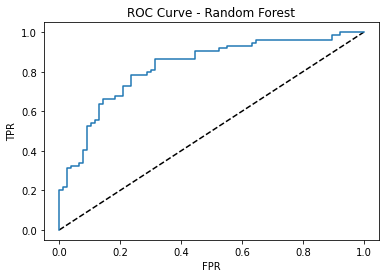

In [86]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest")
plt.show()

### Roc score

In [87]:
roc_auc_score(y_test,y_pred_prob)

0.8234352773826458

### HyperParameter Tunning 

In [88]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_forest, X = X_train, y = y_train, cv = 10)
print(accuracies.mean(), accuracies.std())

0.7409322033898305 0.04485862364607521


In [89]:
from sklearn.model_selection import GridSearchCV

In [91]:
parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 20, 25, 30]
}

In [92]:
grid_search = GridSearchCV(estimator = classifier_forest,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)

best_accuracy =  0.7459322033898305
best_parameters =  {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 200}


In [93]:
random = RandomForestClassifier(criterion = 'gini', max_depth = 30, n_estimators = 200)
random.fit(X_train, y_train)
y_pred = random.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[58, 18],
       [20, 54]], dtype=int64)

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        76
           1       0.75      0.73      0.74        74

    accuracy                           0.75       150
   macro avg       0.75      0.75      0.75       150
weighted avg       0.75      0.75      0.75       150



### Building the model using word_Embedding and  LSTM 

In [95]:
import tensorflow
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [96]:
voc_size = 1000

In [98]:
email_data = [one_hot(data,voc_size) for data in c]

In [99]:
email_data

[[58, 810, 809, 303, 865, 383, 889, 647],
 [104, 803, 206, 406, 494, 660, 989, 624],
 [930,
  735,
  311,
  482,
  498,
  273,
  21,
  303,
  539,
  610,
  408,
  192,
  120,
  178,
  369,
  279,
  751,
  882,
  33],
 [782, 180, 488, 741],
 [992, 587, 303, 236, 469, 586, 255, 414, 552, 991],
 [840, 303, 158, 263, 752, 598, 444, 759, 980, 444],
 [350, 93, 305],
 [547, 303, 117, 202, 598, 931, 598, 887, 649],
 [878, 367],
 [148, 734, 877, 656, 694, 973],
 [643, 772, 211],
 [303, 321, 751, 10, 992, 177, 332, 685],
 [255, 992, 266, 857],
 [56],
 [804, 373, 303, 197, 45, 751, 804, 227],
 [578, 120, 734, 896, 189, 135, 137, 7],
 [250, 81, 669, 547, 947, 829, 93, 710, 672, 30, 515, 553, 177],
 [818, 438, 303, 924, 910, 194, 120, 566, 361, 938, 414, 359, 515, 455],
 [989, 346, 413, 469, 630, 795, 469],
 [792,
  515,
  480,
  608,
  380,
  784,
  165,
  500,
  515,
  686,
  31,
  118,
  12,
  687,
  54,
  178,
  322,
  68,
  515,
  495,
  480,
  841,
  691,
  515,
  597,
  804,
  924,
  994,
  

In [107]:
c[0]

'slow move aimless movi distress drift young man'

In [105]:
email_data[0]

[58, 810, 809, 303, 865, 383, 889, 647]

In [108]:
c = []
for i in email_data:
    c.append(len(i))
print(c)


print("checking highest length value")

print(max(c))

[8, 8, 19, 4, 10, 10, 3, 9, 2, 6, 3, 8, 4, 1, 8, 8, 13, 14, 7, 419, 4, 6, 5, 8, 3, 1, 6, 2, 11, 3, 2, 1, 2, 5, 7, 9, 5, 11, 18, 2, 11, 6, 4, 2, 1, 7, 6, 6, 4, 15, 4, 13, 4, 3, 6, 6, 12, 4, 2, 4, 10, 4, 4, 1, 0, 4, 9, 9, 7, 15, 7, 5, 2, 5, 8, 7, 10, 6, 12, 8, 9, 12, 4, 8, 10, 9, 4, 4, 9, 2, 9, 1, 2, 1, 1, 6, 5, 3, 5, 2, 9, 1, 6, 11, 9, 20, 14, 9, 8, 11, 10, 5, 3, 3, 2, 10, 3, 2, 2, 4, 6, 3, 5, 4, 2, 3, 2, 2, 3, 16, 13, 5, 3, 7, 4, 101, 677, 21, 14, 3, 3, 7, 8, 3, 11, 5, 3, 3, 3, 121, 1, 7, 3, 6, 1, 6, 10, 6, 2, 11, 11, 7, 7, 7, 4, 3, 10, 3, 12, 5, 7, 9, 5, 6, 9, 8, 4, 28, 4, 14, 15, 9, 10, 5, 8, 9, 5, 6, 6, 11, 8, 20, 36, 3, 23, 5, 13, 7, 9, 10, 11, 8, 8, 8, 8, 6, 5, 2, 1, 2, 5, 5, 5, 3, 3, 4, 5, 15, 5, 3, 2, 8, 1, 34, 22, 7, 9, 14, 6, 6, 30, 4, 17, 12, 11, 11, 1, 23, 3, 19, 7, 15, 4, 9, 7, 6, 7, 9, 12, 7, 3, 9, 3, 4, 6, 4, 3, 7, 8, 6, 4, 7, 9, 8, 10, 5, 5, 6, 5, 4, 8, 31, 4, 6, 7, 12, 4, 6, 29, 3, 8, 3, 10, 10, 11, 13, 10, 7, 4, 10, 14, 7, 10, 6, 3, 1, 11, 12, 5, 5, 7, 5, 5, 9, 6, 5, 9

In [109]:
sent_length = 677
email_data_pad = pad_sequences(email_data,maxlen = sent_length,padding = 'post')
print(email_data_pad)

[[ 58 810 809 ...   0   0   0]
 [104 803 206 ...   0   0   0]
 [930 735 311 ...   0   0   0]
 ...
 [178 721   0 ...   0   0   0]
 [738 802   0 ...   0   0   0]
 [112 449 351 ...   0   0   0]]


In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout,Embedding,LSTM,Bidirectional
from tensorflow.keras.activations import sigmoid,relu

In [114]:
model = Sequential()
model.add(Embedding(voc_size,10,input_length=sent_length))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))


In [115]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['acc'])

In [116]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 677, 10)           10000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 677, 50)           12200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 100)               5100      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 47,601
Trainable params: 47,601
Non-trainable params: 0
_________________________________________________________________


In [117]:
X = np.array(email_data_pad)
y = np.array(df['sentiment'])

In [118]:
X

array([[ 58, 810, 809, ...,   0,   0,   0],
       [104, 803, 206, ...,   0,   0,   0],
       [930, 735, 311, ...,   0,   0,   0],
       ...,
       [178, 721,   0, ...,   0,   0,   0],
       [738, 802,   0, ...,   0,   0,   0],
       [112, 449, 351, ...,   0,   0,   0]])

In [120]:
y[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train , X_test , y_trai , y_test = train_test_split(X , y , test_size = 0.33 , random_state = 42)

In [124]:
len(X_test) , len(y_test)

(247, 247)

In [127]:
len(X_train) , len(y_trai)

(501, 501)

In [128]:
model.fit(X_train,y_trai,validation_data = (X_test,y_test),verbose = 2 , batch_size = 64 , epochs = 30)

Epoch 1/30
8/8 - 14s - loss: 0.6930 - acc: 0.5050 - val_loss: 0.6937 - val_acc: 0.4899
Epoch 2/30
8/8 - 9s - loss: 0.6925 - acc: 0.5289 - val_loss: 0.6950 - val_acc: 0.4899
Epoch 3/30
8/8 - 9s - loss: 0.6919 - acc: 0.5289 - val_loss: 0.6954 - val_acc: 0.4899
Epoch 4/30
8/8 - 8s - loss: 0.6916 - acc: 0.5289 - val_loss: 0.6954 - val_acc: 0.4899
Epoch 5/30
8/8 - 7s - loss: 0.6916 - acc: 0.5289 - val_loss: 0.6957 - val_acc: 0.4899
Epoch 6/30
8/8 - 7s - loss: 0.6918 - acc: 0.5289 - val_loss: 0.6966 - val_acc: 0.4899
Epoch 7/30
8/8 - 7s - loss: 0.6917 - acc: 0.5289 - val_loss: 0.6955 - val_acc: 0.4899
Epoch 8/30
8/8 - 7s - loss: 0.6916 - acc: 0.5289 - val_loss: 0.6959 - val_acc: 0.4899
Epoch 9/30
8/8 - 7s - loss: 0.6917 - acc: 0.5289 - val_loss: 0.6958 - val_acc: 0.4899
Epoch 10/30
8/8 - 7s - loss: 0.6916 - acc: 0.5289 - val_loss: 0.6953 - val_acc: 0.4899
Epoch 11/30
8/8 - 7s - loss: 0.6916 - acc: 0.5289 - val_loss: 0.6954 - val_acc: 0.4899
Epoch 12/30
8/8 - 7s - loss: 0.6916 - acc: 0.5289 -

In [129]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [132]:
import warnings
warnings.filterwarnings("ignore")

In [133]:
y_train_pred = model.predict_classes(X_train)

In [134]:
y_test_pred = model.predict_classes(X_test)

In [136]:
accuracy_score(y_trai,y_train_pred) * 100

52.8942115768463

In [137]:
accuracy_score(y_test,y_test_pred)

0.4898785425101215